In [108]:
import sys
import os
import numpy as np
import pandas as pd
np.set_printoptions(threshold=sys.maxsize) # to display the entire array

# Geospatial Pkgs 
import gdal
from gdalconst import *
from osgeo import osr

import shapefile as sh
import geopandas as gpd
from shapely.geometry import LineString, MultiPolygon, Polygon, box, MultiPoint, Point
from shapely import wkt
from wktplot import WKTPlot
from wktplot.plots.osm import OpenStreetMapsPlot #### Import OpenStreetMaps plotting class

# Rasdaman
from rasdapy.db_connector import DBConnector
from rasdapy.query_executor import QueryExecutor

db_connector = DBConnector("localhost", 7001, "rasadmin", "rasadmin")
query_executor = QueryExecutor(db_connector)
db_connector.open() # connection open

if db_connector is not None:
    print("RasDaMan is running") 

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

from platform import python_version

print(f"Py v{python_version()}")

output_notebook()

RasDaMan is running
Py v3.8.10


Loading BokehJS ...

# 1. Functions f(x)

In [109]:
def restart_rasdaman():
    from rasdapy.db_connector import DBConnector
    from rasdapy.query_executor import QueryExecutor

    db_connector = DBConnector("localhost", 7001, "rasadmin", "rasadmin")
    query_executor = QueryExecutor(db_connector)
    db_connector.open() # connection open

In [110]:
def query2array(query):
    result = query_executor.execute_read(query) 
    numpy_array = result.to_array()
    print(numpy_array.shape)
    
    return numpy_array   

In [111]:
def query2array2visuallize(query, title=None, fill_val=None):
    result = query_executor.execute_read(query) 
    # array conversion and cleaning
    numpy_array = result.to_array()
    if fill_val is not None:
        numpy_array = numpy_array.astype('float')
        numpy_array[numpy_array == fill_val] = 'nan'
        data = numpy_array
    else:
        # Data for the heat map
        data = numpy_array
    # Function to show the heat map
    ax = sns.heatmap( data , cmap = 'inferno')
    # Adding details to the plot
    plt.rcParams["figure.figsize"]=(7,5)
    plt.title(title)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    # Displaying the plot
    plt.show()
    return numpy_array   

In [112]:
def query2result(query):
    result = query_executor.execute_read(query) 
    print(result)
    print(type(result))
    return result  

# 2.1 Queries (Rasql) 

In [84]:
collection_list = query_executor.execute_read("select c from RAS_COLLECTIONNAMES as c")
print(collection_list)
pd.DataFrame(collection_list, columns=['Exinting Collection'])

['output1', 'AIR_TEMP_01', 'AIR_TEMP_02', 'AIR_TEMP_03', 'AIR_TEMP_X', 'LST_03_GeoTIFF', 'LST_03_GeoTIFF_FLIPPED', 'LST_03_GeoTIFF_FLIPPED_2023_02_26_20_06_32_2417', 'LST_03_GeoTIFF_FLIPPED_2023_02_26_20_07_10_2660', 'LST_03_GeoTIFF_FLIPPED_CRS', 'Surface_Temperature_Sweden']


,Exinting Collection
0,output1
1,AIR_TEMP_01
2,AIR_TEMP_02
3,AIR_TEMP_03
4,AIR_TEMP_X
5,LST_03_GeoTIFF
6,LST_03_GeoTIFF_FLIPPED
7,LST_03_GeoTIFF_FLIPPED_2023_02_26_20_06_32_2417
8,LST_03_GeoTIFF_FLIPPED_2023_02_26_20_07_10_2660
9,LST_03_GeoTIFF_FLIPPED_CRS


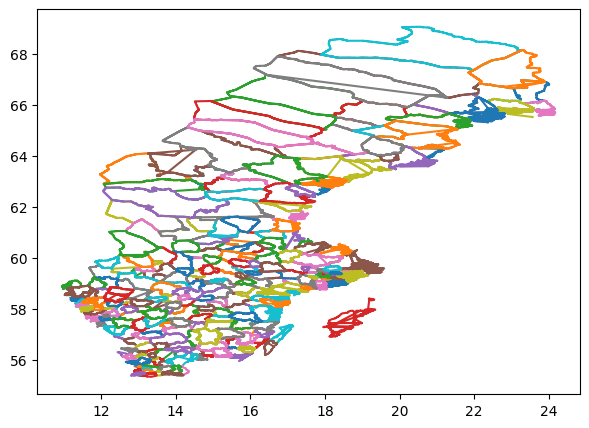

Exception in thread Thread-19:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/home/arkaghosh/.local/lib/python3.8/site-packages/rasdapy/cores/utils.py", line 447, in run
    self._target(*self._args)
  File "/home/arkaghosh/.local/lib/python3.8/site-packages/rasdapy/cores/remote_procedures.py", line 73, in rasmgr_keep_alive
    return stub.KeepAlive(make_rasmgr_keep_alive_req(cuuid), _TIMEOUT_SECONDS)
  File "/home/arkaghosh/.local/lib/python3.8/site-packages/grpc/_channel.py", line 946, in __call__
    return _end_unary_response_blocking(state, call, False, None)
  File "/home/arkaghosh/.local/lib/python3.8/site-packages/grpc/_channel.py", line 849, in _end_unary_response_blocking
    raise _InactiveRpcError(state)
grpc._channel._InactiveRpcError: <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.UNKNOWN
	details = "NThe client with client ID 16 does not exist: cannot reset client's

In [152]:
sf = sh.Reader('/home/arkaghosh/Downloads/RASDAMAN_FINALE/Worked/Sweden/SWE_adm/SWE_adm2.shp')
sf.bbox

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

In [168]:
q1 = "select m[100, 0:10 , 0:10] from Surface_Temperature_Sweden as m"

q11 = "select m[100, 400:500 , 1000:1200] from Surface_Temperature_Sweden as m"

q2 = "select m[100, 0:* , 0:*] from Surface_Temperature_Sweden as m" 

q3 = "select mr[100, 0:* , 0:*]*0.02 from Surface_Temperature_Sweden as mr" 

q4 = "select ddd[100:200, 0:* , 0:*]*0.02 from Surface_Temperature_Sweden as ddd where avg_cells(ddd)" 

q5 = "select sss[100:200, 0:* , 0:*]*0.02 from Surface_Temperature_Sweden as sss where all_cells(sss < 300)" 

q51 = "select all_cells(s[100, 0:* , 0:*]*0.02 > 275) from Surface_Temperature_Sweden as s"

q52 = "select ddd[100:200, 0:* , 0:*]*0.02 from Surface_Temperature_Sweden as ddd where all_cells(ddd[100, 0:* , 0:*]*0.02 >265)"

q6 = "select avg_cells(c) from Surface_Temperature_Sweden AS c"

q7 = "select avg_cells(c[100:200, 0:* , 0:*]*0.02) from Surface_Temperature_Sweden AS c"

q8 = "select clip(m[100, 0:* , 0:*], POLYGON((21 63,21 64,19 64,19 63,21 63))) from Surface_Temperature_Sweden as m" 

q9999 = "select mr from mr where all_cells( mr > 20 )"

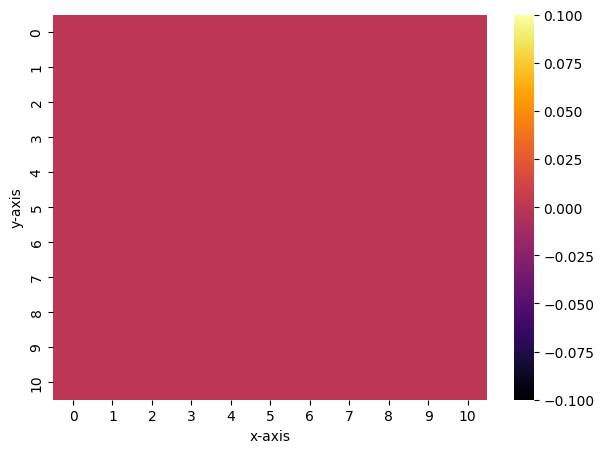

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [169]:
query2array2visuallize(q1)

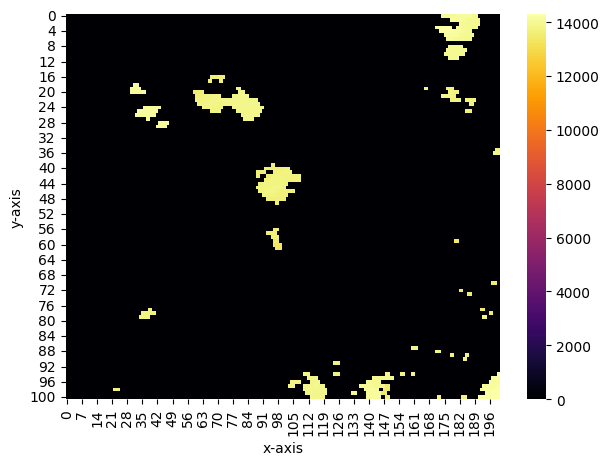

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [170]:
query2array2visuallize(q11)

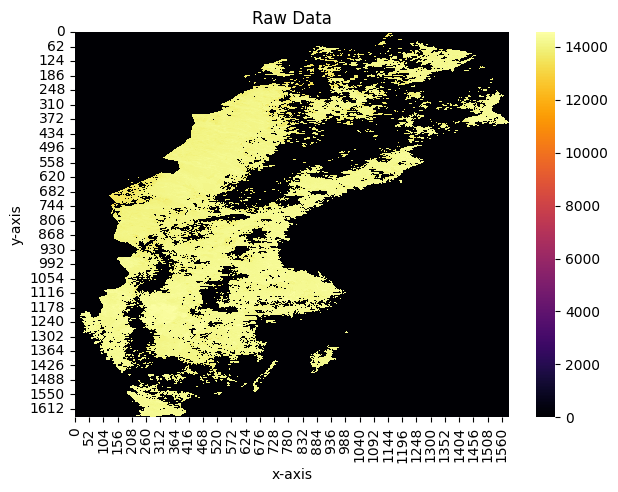

0

In [11]:
query2array2visuallize(q2, "Raw Data")

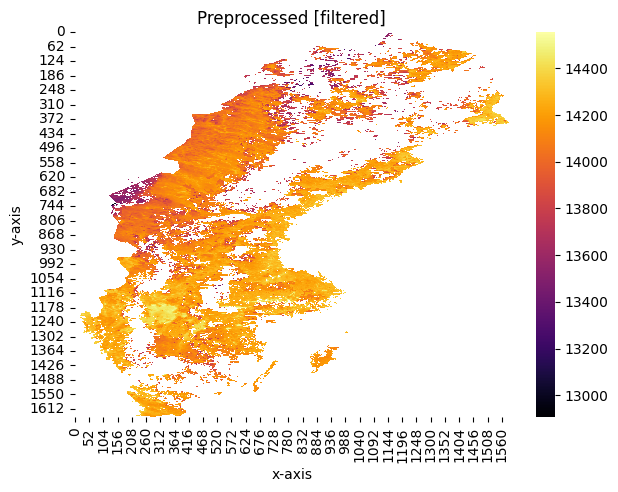

0

In [12]:
query2array2visuallize(q2, "Preprocessed [filtered]", 0)

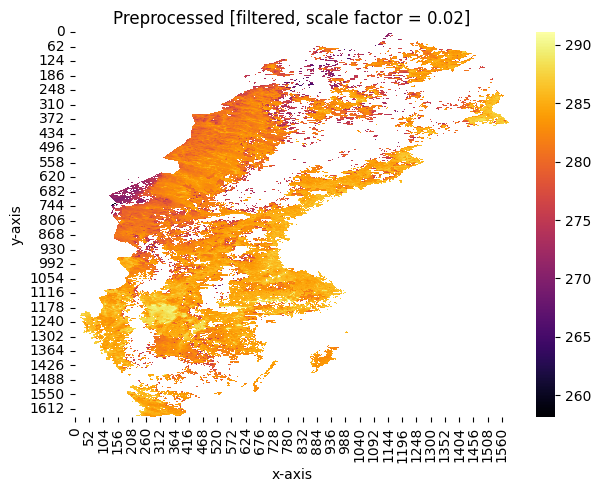

0

In [13]:
query2array2visuallize(q3, "Preprocessed [filtered, scale factor = 0.02]", 0)

In [14]:
query2array2visuallize(q4, "Preprocessed [filtered, scale factor = 0.02 & max_val]", 0)

Exception: Error executing query 'select ddd[100:200, 0:* , 0:*]*0.02 from Surface_Temperature_Sweden as ddd where avg_cells(ddd)', error message 'rasdaman error 359: Execution error 359 in line 1, column 76, near token where: Result of the where clause must be of type boolean.'

In [15]:
query2array2visuallize(q52, "Preprocessed [filtered, scale factor = 0.02 & all_val>265]", 0)

AttributeError: 'NoneType' object has no attribute 'intervals'

In [80]:
query2result(q51)

False
<class 'rasdapy.models.result_array.ResultArray'>


In [16]:
query2result(q6)

3.6421253738942254
<class 'rasdapy.models.result_array.ResultArray'>


In [17]:
query2result(q7)

279.98762699937754
<class 'rasdapy.models.result_array.ResultArray'>


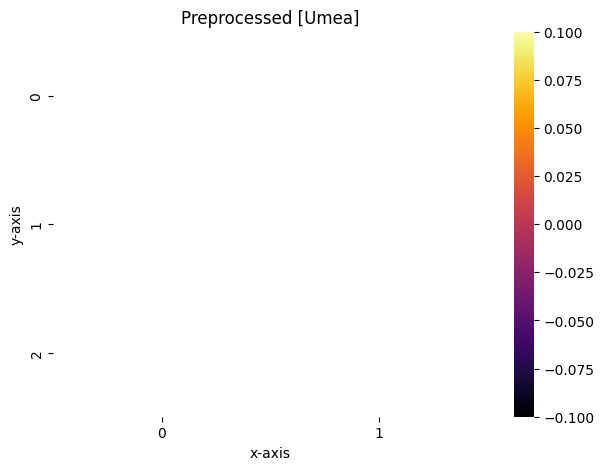

array([[nan, nan],
       [nan, nan],
       [nan, nan]])

In [171]:
query2array2visuallize(q8, "Preprocessed [Umea]", 0)

In [160]:
restart_rasdaman()

# 2.2 Queries (WCPS) 

In [86]:
from owslib.wcs import WebCoverageService 
from owslib.wms import WebMapService
import requests
import json
import werkzeug
import io
import xarray as xr
import uuid
import xml.etree.ElementTree as ET
import base64

In [19]:
wcs = WebCoverageService ('http://localhost:8080/rasdaman/ows', version='2.0.1')
wcs.contents

{'Surface_Temperature_Sweden': <owslib.coverage.wcs201.ContentMetadata at 0x7f6b890d1850>}

In [20]:
[op.name for op in wcs.operations]

['GetCapabilities',
 'DescribeCoverage',
 'GetCoverage',
 'ProcessCoverages',
 'InsertCoverage',
 'UpdateCoverage',
 'DeleteCoverage',
 'PostEncoding']

In [21]:
wms = WebMapService('http://localhost:8080/rasdaman/ows', version='1.3.0')
wms.contents

OrderedDict()

In [22]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap']

In [23]:
def wcps_rasdaman(query, ip, file_name=''):
    """
    Sends a WCPS query to a Rasdaman server and wraps the response for further use in Python depending on the 
    the response format chosen in the query.
    
    Args: 
        query (str) -- WCPS query you want to send to the Rasdaman server
        ip (str) -- IP of Rasdaman server (default saocompute.eurac.edu)
    
    Returns:
        Either one of the following
        - Numpy array for JSON/CSV formatted response
        - Xarray Dataset for a netCDF formatted response
        - Filepath to a TIFF/JPEG/JP2/PNG file saved to disk, in respect to the response image type
        - The response object, when the response could not be processed
    
    Sources:
        http://xarray.pydata.org/en/stable/io.html#netcdf
        http://xarray.pydata.org/en/stable/data-structures.html
        
    Author: Harald Kristen, Alexander Jacob
    Date: 2019-05-29
    """

    #set the work directory
    work_directory = '/home/arkaghosh/Downloads/rasdapy3_dir/'#os.getcwd()
    
    #print('WCPS init')
    
    if ip == 'saocompute.eurac.edu/sincohmap' or ip == 'saocompute.eurac.edu':
        url = 'http://' + ip + '/rasdaman/ows?SERVICE=WCS&VERSION=2.0.1&REQUEST=ProcessCoverages'  
    else:
        url = 'http://' + ip + ':8080/rasdaman/ows?SERVICE=WCS&VERSION=2.0.1&REQUEST=ProcessCoverages'
    
    #Fix the special characters used the input query like ' ', $ and so on
    query = werkzeug.urls.url_fix(query)
    print('This is the URL, used for the request:\n' + url + '&query=' + query)
    url = url + '&query=' + query
    #r = requests.get(url, stream=False)

    try:
        #Send the request to Rasdaman and save the response in the variable "r"
        r = requests.get(url, stream=True)
    except Exception as ex:
        print(type(ex))
        print(ex.args)
        print(ex)

    #If there is an error, plot the error message that comes from Rasdaman & exit script
    if r.status_code != requests.codes.ok:
        print('HTTP Error ' + str(r.status_code))
        root = ET.fromstring(r.text)
        for element in root.iter():
            if element.tag == '{http://www.opengis.net/ows/2.0}ExceptionText':
                print(element.text)

    print('currently receiving content of type: ' + r.headers['Content-Type'])

    #print('This is the URL, used for the request \n' + r.url)

    if r.headers['Content-Type'] == 'text/plain':
        #print('return type is text')
        # Convert CSV or json to NumpyArray
        response_text = r.text()
        output = response_text
        # The JSON version also works for 2D arrays.
        if response_text.startswith("{"):
            loaded = r.json()
            output = np.array(loaded)
        else:
            output = np.fromstring(response_text[1:-1], dtype = float, sep = ',')

    elif r.headers['Content-Type'] == 'application/json':
        # Convert JSON to NumpyArray
        loaded = r.json()
        output = np.array(loaded)

    elif r.headers['Content-Type'] == 'application/netcdf':
        print(r.headers)
        # create x array dataset from input stream
        if file_name == '':
            file_name = 'wcps_' + str(uuid.uuid4()) + '.nc'
        print('the following file has been saved locally: ' + file_name)
        with io.open(file_name, 'wb') as outfile:
            outfile.write(r.content)        
        output_open = xr.open_dataset(file_name)
        # Xarray is normally lazy loading netCDF files
        # As we want to perform intense computation, we load the file directly in the main memory with Dataset.load()
        output = xr.Dataset.load(output_open)

    elif r.headers['Content-Type'] in ['image/tiff', 'image/png', 'image/jp2', 'image/jpeg']:
        # Write response in choosen image format to disk and print filepath
        image_type = r.headers['Content-Type']
        if file_name == '':
            file_ending = image_type[6:]
            # write TIFF to disk and print filepath
            tf = 'wcps_' + str(uuid.uuid4())
            file_name = tf + '.' + file_ending
        with io.open(file_name, 'wb') as outfile:
            outfile.write(r.content)
        print('the following file has been saved locally: ' + file_name)
        output = file_name

    else:
        output = r
        output_type = r.headers['Content-Type']
        print('The response could not be processed, as it is a ' + output_type)

    return output

In [24]:
out = wcps_rasdaman('for c in Surface_Temperature_Sweden return avg(c)','localhost')
print(out)

/tmp/ipykernel_6093/2847576673.py:36: DeprecationWarning: 'werkzeug.urls.url_fix' is deprecated and will be removed in Werkzeug 3.0.
  query = werkzeug.urls.url_fix(query)


This is the URL, used for the request:
http://localhost:8080/rasdaman/ows?SERVICE=WCS&VERSION=2.0.1&REQUEST=ProcessCoverages&query=for%20c%20in%20Surface_Temperature_Sweden%20return%20avg(c)
currently receiving content of type: 
The response could not be processed, as it is a 
<Response [200]>


In [ ]:
out = wcps_rasdaman('for c in Surface_Temperature_Sweden return avg(c)','localhost')
print(out)

## 2.3 Pre processing
### Vector Data

In [87]:
sweden_gdf = gpd.read_file('/home/arkaghosh/Downloads/RASDAMAN_FINALE/Worked/Sweden/SWE_adm/SWE_adm2.shp')
print(sweden_gdf)
#sweden_gdf.plot()

     ID_0  ISO  NAME_0  ID_1           NAME_1  ID_2      NAME_2    TYPE_2  \
0     222  SWE  Sweden     1     Östergötland     1     Ödeshög  Kommuner   
1     222  SWE  Sweden     1     Östergötland     2  Åtvidaberg  Kommuner   
2     222  SWE  Sweden     1     Östergötland     3     Boxholm  Kommuner   
3     222  SWE  Sweden     1     Östergötland     4    Finspång  Kommuner   
4     222  SWE  Sweden     1     Östergötland     5       Kinda  Kommuner   
..    ...  ...     ...   ...              ...   ...         ...       ...   
281   222  SWE  Sweden    21  Västra Götaland   282   Uddevalla  Kommuner   
282   222  SWE  Sweden    21  Västra Götaland   283  Ulricehamn  Kommuner   
283   222  SWE  Sweden    21  Västra Götaland   284  Vänersborg  Kommuner   
284   222  SWE  Sweden    21  Västra Götaland   285    Vårgårda  Kommuner   
285   222  SWE  Sweden    21  Västra Götaland   286        Vara  Kommuner   

        ENGTYPE_2  NL_NAME_2 VARNAME_2  \
0    Municipality        NaN     

In [103]:
print(sweden_gdf.NAME_2[214])
sweden_gdf.geometry[214]
sweden_gdf.geometry[214].bounds
# sweden_gdf.bounds

Umeå


(19.684761047363338, 63.47499847412115, 21.012500762939453, 64.38013458251964)

In [89]:
geom_Umeå = sweden_gdf.geometry[214]
print(geom_Umeå)

MULTIPOLYGON (((20.642257690429744 63.875431060791016, 20.65245056152355 63.87538528442383, 20.662643432617188 63.875339508056754, 20.672838211059627 63.87529373168951, 20.683032989502067 63.875247955322266, 20.693225860595703 63.87520217895508, 20.703420639038143 63.875152587890625, 20.703308105468807 63.87065887451183, 20.713500976562443 63.87060928344721, 20.723691940307674 63.87055969238281, 20.72357749938965 63.86606597900402, 20.723539352417106 63.864582061767635, 20.722917556762695 63.864582061767635, 20.720832824707088 63.864582061767635, 20.7192707061767 63.86405944824219, 20.7192707061767 63.86302185058605, 20.720832824707088 63.862499237060604, 20.722917556762695 63.862499237060604, 20.72348594665533 63.862499237060604, 20.723463058471737 63.861572265625, 20.723377227783203 63.85818099975597, 20.722917556762695 63.85833358764654, 20.720832824707088 63.85833358764654, 20.7192707061767 63.8578147888183, 20.718750000000057 63.85625076293957, 20.7192707061767 63.85469055175781, 

In [116]:
sf = sh.Reader('/home/arkaghosh/Downloads/RASDAMAN_FINALE/Worked/Sweden/SWE_adm/SWE_adm2.shp')
sf.bbox

[10.961388587951717, 55.336250305175895, 24.172395706176758, 69.05903625488291]

In [150]:
ds = gdal.Open('/home/arkaghosh/Downloads/RAS_DATA/MOD11A1.006_LST_Night_1km_doy20170101_aid0001.tif')
ds = gdal.Translate('Umea_Neg_LongLat.tif', ds, projWin = [-64.38013458251964, 21.012500762939453, -63.47499847412115, 19.684761047363338])
ds = None


In [151]:
input_file = '/home/arkaghosh/Downloads/RAS_DATA/MOD11A1.006_LST_Night_1km_doy20170101_aid0001.tif'
output_file = 'Umea_gpt.tif'
win_xmin, win_ymin, win_xmax, win_ymax = -64.38013458251964, 21.012500762939453, -63.47499847412115, 19.684761047363338
ds = gdal.Open(input_file)
 
# Calculate the window dimensions
win_width = int((win_xmax - win_xmin) / ds.GetGeoTransform()[1])
win_height = int((win_ymax - win_ymin) / ds.GetGeoTransform()[5])

print(win_width)
print(win_height)
# Ensure the window dimensions are positive
# win_width = abs(win_width)
# win_height = abs(win_height)
 
# # Compute the window offset
# win_xoff = int((win_xmin - ds.GetGeoTransform()[0]) / ds.GetGeoTransform()[1])
# win_yoff = int((win_ymin - ds.GetGeoTransform()[3]) / ds.GetGeoTransform()[5])
 
# ds = gdal.Translate(output_file, ds, srcWin=[win_xoff, win_yoff, win_width, win_height])
# ds = None

108
159


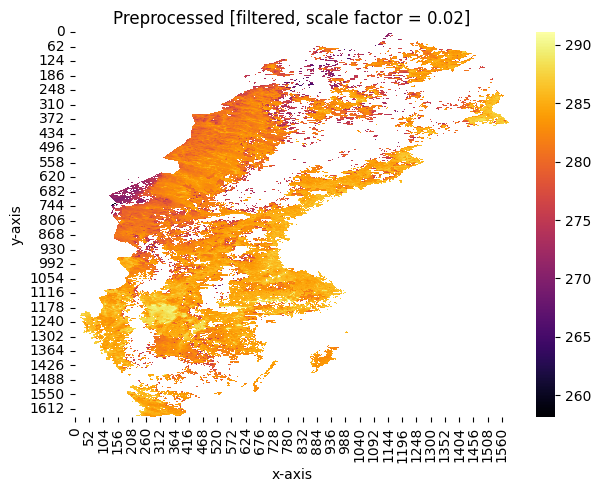

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f6b7fa42360> >

In [68]:
from osgeo import gdal
from osgeo import gdal_array
from osgeo import osr


array = query2array2visuallize(q3, "Preprocessed [filtered, scale factor = 0.02]", 0)
lat = np.array((55.333333328376286606, 69.066666660479313394))
lon = np.array((10.95833333235162860504731861, 24.17499999783427739495268139))

xmin,ymin,xmax,ymax = [lon.min(),lat.min(),lon.max(),lat.max()]
nrows,ncols = np.shape(array)
xres = (xmax-xmin)/float(ncols)
yres = (ymax-ymin)/float(nrows)
geotransform=(xmin,xres,0,ymax,0, -yres)   
# That's (top left x, w-e pixel resolution, rotation (0 if North is up), 
#         top left y, rotation (0 if North is up), n-s pixel resolution)
# I don't know why rotation is in twice???

#output_raster = gdal.GetDriverByName('GTiff').Create('myraster_01.tif',ncols, nrows, 1 ,gdal.GDT_Float32)  # Open the file
output_raster.GetRasterBand(1).WriteArray(array) # Writes my array to the raster
output_raster.SetGeoTransform(geotransform)  # Specify its coordinates
srs = osr.SpatialReference()                 # Establish its coordinate encoding
srs.ImportFromEPSG(4326)                     # This one specifies WGS84 lat long.
                                             # Anyone know how to specify the 
                                             # IAU2000:49900 Mars encoding?
output_raster.SetProjection( srs.ExportToWkt() )   # Exports the coordinate system 
                                                   # to the file
output_raster
# output_raster.FlushCache()

In [61]:
geotransform

(10.958333332351629,
 0.00833333333258679,
 0,
 69.06666666047931,
 0,
 -0.00833333333258679)

In [153]:
import pyproj
from shapely.geometry import box

# Define the CRS (coordinate reference system) for the coordinates
crs = "EPSG:4326"

# Define the corners of the Umea bounding box
ume_bbox = [19.757331162882713, 63.54158456667922, 21.012500762939453, 64.380134753]

# Create a projection transformer to convert coordinates
transformer = pyproj.Transformer.from_crs(crs, crs, always_xy=True)

# Transform the Umea bounding box corners to the desired CRS
ume_min_lon, ume_min_lat = transformer.transform(ume_bbox[0], ume_bbox[1])
ume_max_lon, ume_max_lat = transformer.transform(ume_bbox[2], ume_bbox[3])

# Create a Shapely box object with the transformed coordinates
ume_bbox_wkt = box(ume_min_lon, ume_min_lat, ume_max_lon, ume_max_lat).wkt

print(ume_bbox_wkt)

POLYGON ((21.012500762939453 63.54158456667922, 21.012500762939453 64.380134753, 19.757331162882714 64.380134753, 19.757331162882714 63.54158456667922, 21.012500762939453 63.54158456667922))
